In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm


In [10]:
np.random.seed(0)
X = np.r_[np.random.randn(10, 2) + [1, 1], np.random.randn(10, 2)]
y = [1] * 10 + [-1] * 10

In [33]:
np.random.randn(10, 2) 

array([[-1.93627981,  0.1887786 ],
       [ 0.52389102,  0.08842209],
       [-0.31088617,  0.09740017],
       [ 0.39904635, -2.77259276],
       [ 1.95591231,  0.39009332],
       [-0.65240858, -0.39095338],
       [ 0.49374178, -0.11610394],
       [-2.03068447,  2.06449286],
       [-0.11054066,  1.02017271],
       [-0.69204985,  1.53637705]])

In [28]:
sample_weight_last_ten = abs(np.random.randn(len(X)))
sample_weight_constant = np.ones(len(X))
sample_weight_last_ten[15:] *= 5
sample_weight_last_ten[9] *= 15  

In [25]:
# for reference, first fit without sample weights
# fit the model
clf_weights = svm.SVC(gamma=1)
clf_weights.fit(X, y, sample_weight=sample_weight_last_ten)

clf_no_weights = svm.SVC(gamma=1)
clf_no_weights.fit(X, y)

SVC(gamma=1)

In [26]:
def plot_decision_function(classifier, sample_weight, axis, title):
    # plot the decision function
    xx, yy = np.meshgrid(np.linspace(-4, 5, 500), np.linspace(-4, 5, 500))

    Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # plot the line, the points, and the nearest vectors to the plane
    axis.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.bone)
    axis.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        s=100 * sample_weight,
        alpha=0.9,
        cmap=plt.cm.bone,
        edgecolors="black",
    )

    axis.axis("off")
    axis.set_title(title)

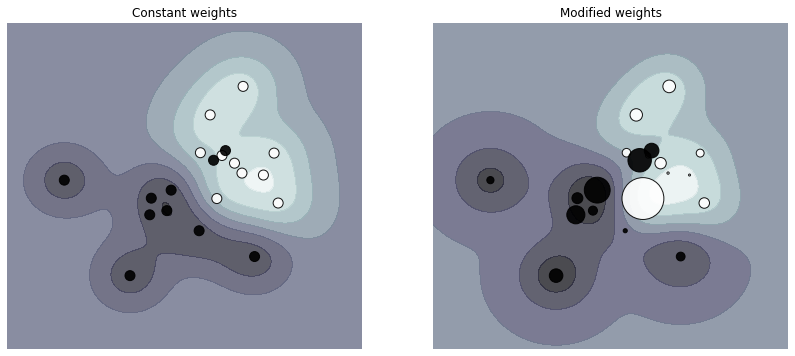

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plot_decision_function(
    clf_no_weights, sample_weight_constant, axes[0], "Constant weights"
)
plot_decision_function(clf_weights, sample_weight_last_ten, axes[1], "Modified weights")

plt.show()